In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", "font.sans-serif":"Arial"})

# Rutherford's model of the atom

### Where are we after Rutherford, Geiger, and Marsden's experiments?

Experiments in Rutherford's lab demonstrated that atoms were mostly <strong>empty space</strong>: most $\alpha$ particles shot at the gold foil went straight through, but some of them were deflected through large angles or even back-scattered. In the plum pudding model, most alpha particles would be deflected through very small angles and backscattering would not be possible. Therefore, the plum pudding model is wrong: positive charges are not spread evenly in a continuous medium, with electrons sprinkled throughout like raisins. Instead, both the positive and negative charges are confined to tiny volumes.

Below we will calculate the classical electron radius ("classical" means no quantum theory is included), then compare it with the experimentally measured proton charge radius and the electron ground state orbital radius (Bohr radius) in the hydrogen atom. We find the classical electron radius, also called the <strong>Compton radius</strong>, by equating the electrostatic potential energy of a sphere of charge $e$ and unknown radius $r_e$ with the rest energy of the electron. To calculate the electrostatic potential energy $U$ of a sphere of evenly distributed charge, we start with Coulomb's law in scalar form,

### $F = \frac{1}{4 \pi \epsilon_0} \frac{q_1 \, q_2}{r^2}$,

then move from point charges to a charge distribution by setting $q_1 q_2 \approx e^2$, where $e$ is the elementary charge. The potential energy in our charge distribution is then

### $U = \frac{1}{4 \pi \epsilon_0} \frac{e^2}{r_e}$.

Setting $U = m_e c^2$, where $m_e$ is the electron mass, we solve for $r_e$:

## $r_e = \frac{e^2}{4 \pi \epsilon_0 \, m_e \, c^2}$.

<strong>Note: we cannot calculate the proton charge radius in the same way because protons are made of constituent particles (quarks and gluons), so the assumption that the charge is evenly distributed throughout the proton breaks down. We will rely on experimentally measured values.</strong>

Note: there are still uncertainties about the charge radius and mass radius of the proton, and these two radii are not the same.

In [2]:
'''Calculate classical electron radius'''
r_e = constants.elementary_charge**2 / \
      (4 * np.pi * constants.epsilon_0 * constants.electron_mass * constants.c**2)

print('Classical electron radius (m):', f"{r_e:.4g}")

'''Compare the classical electron radius we calculate with the value in scipy.constants'''
print('scipy value of classical electron radius:', 
      constants.physical_constants['classical electron radius'])

Classical electron radius (m): 2.818e-15
scipy value of classical electron radius: (2.8179403262e-15, 'm', 1.3e-24)


In the tuple printed above, the middle quantity is the unit and the last quantity is the uncertainty on the measurement.

<strong>Below is <tt>scipy</tt>'s value of the proton charge radius.</strong> Since the constituent particles in the proton can move, the value quoted is actually a root-mean-square (rms) of a distribution of radii.

In [3]:
print('scipy value of proton charge radius:', 
      constants.physical_constants['proton rms charge radius'])

scipy value of proton charge radius: (8.414e-16, 'm', 1.9e-18)


Yes, the proton charge radius is actually smaller than the classically calculated electron radius!

<strong>Finally, here is the Bohr radius</strong>, which is the distance from the nucleus where the electron in a ground-state hydrogen atom is most likely to be. Note, we will calculate the Bohr radius analytically later, but for now we will rely on <tt>scipy</tt>'s value.

In [4]:
print('Bohr radius:', constants.physical_constants['Bohr radius'])

Bohr radius: (5.29177210903e-11, 'm', 8e-21)


### Let's plot all three radii on a number line:

Text(1.3e-10, -0.003, 'meters')

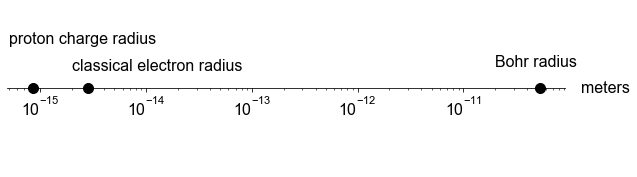

In [5]:
fig, ax = plt.subplots(figsize=(10,3))
ax.scatter([r_e], [0], color='k', s=100)
ax.scatter([constants.physical_constants['proton rms charge radius'][0]], 0, color='k', s=100)
ax.scatter([constants.physical_constants['Bohr radius'][0]], 0, color='k', s=100)
ax.set_xscale("log")
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
ax.text(5e-16, 0.03, 'proton charge radius')
ax.text(2e-15, 0.012, 'classical electron radius')
ax.text(2e-11, 0.015, 'Bohr radius')
ax.text(1.3e-10, -0.003, 'meters')

<strong>Takeaway from the number line:</strong> The distance between the proton and electron in a hydrogen atom is a factor of $\approx 10000$ larger than either the proton or the electron. Atoms are mostly empty space.

### The classical atomic model

Based on our number line, it makes sense to base our model for the hydrogen atom on the solar system. Both have objects that held together by an attractive force (gravity / Coulomb force) and are separated by distances that are much larger than their radii. For comparison, the sun's radius is $R_{\odot} = 6.96 \times 10^8$ m, Earth's radius is $R_{\oplus} = 6.378 \times 10^6$ m,  the average Earth-sun distance, or astronomical unit, is $1.50 \times 10^{11}$ m, and $1 {\rm AU} / R_{\odot} = 215$. 

Rutherford proposed the "planetary" model of the atom, a schematic of which is below:

(-1.05, 1.05)

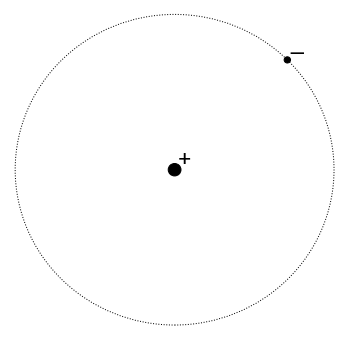

In [6]:
orb = plt.Circle((0, 0), 1, color='k', ls=':', fill=False)
proton = plt.Circle((0, 0), 0.04, color='k')
electron = plt.Circle((np.cos(np.pi/4), np.sin(np.pi/4)), 0.02, color='k')

fig, ax = plt.subplots(figsize=(6,6))
ax.add_patch(orb)
ax.add_patch(proton)
ax.add_patch(electron)
ax.text(0.021, 0.021, '+', fontsize='x-large')
ax.text(np.cos(np.pi/4)+0.02, np.sin(np.pi/4)+0.07, '_', fontsize='x-large')
ax.axis('off')
ax.set_xlim([-1.05, 1.05])
ax.set_ylim([-1.05, 1.05])

<strong>Here's the problem:</strong> We know that accelerating charged particles emit light. An electron orbiting the nucleus in uniform circular motion is accelerating, so it would continually emit photons. <em>But there must be an energy source available to create the photons</em>, and that is the potential energy in the orbit. So over time, the electron would lose potential energy and spiral into the nucleus:

(0.0, 6.283185307179586, 0.0, 1.05)

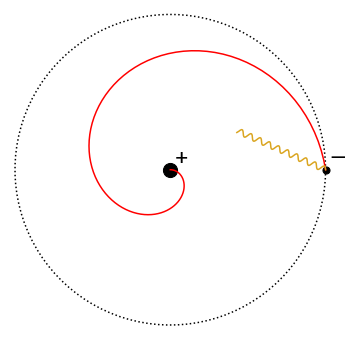

In [7]:
thetas = np.linspace(0, 2*np.pi, num=100)

# Function to calculate a spiral path
spiral = lambda theta, r0: r0 - theta/(2*np.pi)

fig, ax = plt.subplots(figsize=(6,6), subplot_kw={'projection': 'polar'})
ax.plot(thetas, np.ones(100), color='k', ls=':')
ax.plot(thetas, spiral(thetas, 1), color='r')
ax.scatter([0], [0], color='k', s=200)
ax.scatter([0], [1], color='k', s=50)
ax.text(np.pi/4, 0.04, '+', fontsize='x-large')
ax.text(0.1, 1.04, '_', fontsize='x-large')
plt.rcParams.update({'path.sketch': (3, 10, 1)})
ax.plot([0, np.pi/6], [1, 0.5], color='goldenrod')
ax.axis('off')

Planets orbiting stars emit gravitational waves, but the strength of the gravitational force is so low in comparison to the electric force that the change to the planet's orbit is negligible over the age of the universe. However, for two black holes / neutron stars orbiting each other, the mutual gravitational forces are strong enough and the distances between them get small enough for gravitational waves to matter. Then the orbital decay is very similar to what we see above, and LIGO will sometimes detect the gravitational waves when the objects merge.

### We have to keep the atom stable

Next: the Bohr model. This is the transition from classical to quantum mechanics.